# Machine learning application for a dataset of Bose Higgs

In this project, we explore various classification algorithms to analyze the dataset, build predictive models, and evaluate their performance. We implement an Artificial Neural Network (ANN) to compute the model’s precision and compare results across different subsets of input features (low-level and high-level).

The aim is to assess the effectiveness of each method in distinguishing signal from background events in a supersymmetric Higgs scenario.

## a) **Classiffier**


In [36]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/diakonidis/HIGGS_8K.csv')

# Check if the dataframe is missing any values
df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1.00E+00   8000 non-null   int64  
 1   8.69E-01   8000 non-null   float64
 2   -6.35E-01  8000 non-null   float64
 3   2.26E-01   8000 non-null   float64
 4   3.27E-01   8000 non-null   float64
 5   -6.90E-01  8000 non-null   float64
 6   7.54E-01   8000 non-null   float64
 7   -2.49E-01  8000 non-null   float64
 8   -1.09E+00  8000 non-null   float64
 9   0.00E+00   8000 non-null   float64
 10  1.37E+00   8000 non-null   float64
 11  -6.54E-01  8000 non-null   float64
 12  9.30E-01   8000 non-null   float64
 13  1.11E+00   8000 non-null   float64
 14  1.14E+00   8000 non-null   float64
 15  -1.58E+00  8000 non-null   float64
 16  -1.05E+00  8000 non-null   float64
 17 

In [37]:
#all rows all columns but expect first (column 1-28)
X_data = df.iloc[:, 1:]
#all rows, only the first column (column 0 )
y_class = df.iloc[:, 0]
X_data.head()

,8.69E-01,-6.35E-01,2.26E-01,3.27E-01,-6.90E-01,7.54E-01,-2.49E-01,-1.09E+00,0.00E+00,1.37E+00,...,-1.05E-02,-4.58E-02,3.10E+00,1.35E+00,9.80E-01,9.78E-01,9.20E-01,7.22E-01,9.89E-01,8.77E-01
0,1.630428,0.404143,0.401026,2.722409,0.355644,1.362199,0.015818,-1.174111,0.000000,1.002695,...,0.387635,1.596321,1.550981,0.859235,0.827233,0.995416,0.764766,0.520597,0.850413,0.929865
1,0.326305,-0.797735,0.223471,1.248234,-1.427857,0.923767,-0.278280,-0.470052,0.000000,0.894418,...,-0.426866,1.153501,0.000000,0.887944,0.924601,0.987189,0.854094,0.385013,0.789912,0.724627
2,1.381170,0.521993,0.574698,0.357347,0.037136,0.413057,-0.607036,-1.308270,0.000000,0.655957,...,0.567525,-1.475778,0.000000,0.936186,1.107217,0.983808,0.693327,0.562045,0.825387,0.846233
3,0.304161,-0.736375,0.686225,0.477172,-1.274736,0.907003,0.324770,-0.463954,2.173076,0.468865,...,0.904818,1.165154,0.000000,1.181790,1.033701,0.993943,0.648399,0.936097,0.732592,0.661779
4,0.661761,0.486930,0.542516,2.630618,1.098063,1.021878,-2.306271,-0.652999,0.000000,1.700830,...,-0.943217,0.566404,3.101961,4.883954,2.585889,0.992005,1.935075,1.144530,1.818775,2.094304


In [38]:
y_class

,1.00E+00
0,0
1,1
2,1
3,1
4,1
...,...
7995,1
7996,0
7997,1
7998,0


In [39]:
# Splitting the dataset into trainning  and test daata
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_class, test_size = 0.25, random_state = 42)

In [40]:
X_train

,8.69E-01,-6.35E-01,2.26E-01,3.27E-01,-6.90E-01,7.54E-01,-2.49E-01,-1.09E+00,0.00E+00,1.37E+00,...,-1.05E-02,-4.58E-02,3.10E+00,1.35E+00,9.80E-01,9.78E-01,9.20E-01,7.22E-01,9.89E-01,8.77E-01
3836,0.749971,-0.702286,0.386045,1.192325,-0.740626,0.488266,1.491261,-1.551087,2.173076,0.639716,...,0.344328,-1.200542,3.101961,0.880833,0.990198,1.112521,0.705909,0.412651,0.838709,0.729433
6408,0.646022,-1.429840,1.647800,0.300419,0.765687,1.251446,-0.440678,-0.891380,0.000000,1.296806,...,-0.057093,-0.027455,0.000000,0.905298,0.878399,0.978860,0.823843,1.234711,0.737102,0.665027
4840,0.661761,-0.567878,0.317242,0.345002,-1.277267,1.084629,2.240865,-0.896369,0.000000,0.750763,...,2.205688,1.583003,0.000000,0.921575,0.908112,0.986010,0.517904,0.492038,0.604469,0.644453
527,0.583250,1.686860,-0.278226,0.979551,1.532366,0.654259,2.240865,0.179224,0.000000,0.916074,...,1.152999,0.934865,0.000000,0.604380,0.857669,1.045220,0.820037,0.712947,0.803049,0.721624
6105,0.536034,1.365450,-0.749306,2.094681,0.009966,0.898667,0.256444,1.613948,0.000000,0.707452,...,0.550868,0.979258,3.101961,1.034976,1.073982,0.987045,0.787476,0.535101,0.652412,0.784540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,0.301782,1.679068,0.654043,1.250684,-1.429821,0.513550,-0.334723,0.917098,2.173076,0.904743,...,-1.561172,1.654586,0.000000,1.912328,1.204280,0.983197,1.814277,0.855579,1.287443,1.437053
5390,0.478569,1.225199,-1.622658,1.919706,-1.209018,0.997603,-1.465566,0.313383,2.173076,0.476797,...,1.144671,0.677386,0.000000,0.930481,1.152707,0.979980,0.883238,0.539095,1.208899,1.159287
860,0.865633,0.313564,-0.556215,2.096674,-0.097666,0.864131,-0.356508,1.216460,2.173076,0.573113,...,1.073048,-1.729928,3.101961,1.722980,1.111352,0.985766,1.315615,1.093190,1.099513,1.051026
7603,1.035465,1.257340,-1.588812,2.096193,1.388253,0.614593,1.141710,-0.078109,2.173076,0.548813,...,1.247108,-0.672820,0.000000,0.823440,0.751624,0.988628,1.351516,0.985051,1.076640,0.906995


In [41]:
X_test

,8.69E-01,-6.35E-01,2.26E-01,3.27E-01,-6.90E-01,7.54E-01,-2.49E-01,-1.09E+00,0.00E+00,1.37E+00,...,-1.05E-02,-4.58E-02,3.10E+00,1.35E+00,9.80E-01,9.78E-01,9.20E-01,7.22E-01,9.89E-01,8.77E-01
2215,1.265142,1.273897,1.163961,0.779618,-0.599616,2.038719,0.819885,1.404948,2.173076,2.186566,...,-1.664442,-0.096264,0.000000,0.763816,0.826604,1.375649,1.249914,3.437502,1.741132,1.394216
2582,1.560519,-0.897079,-1.438444,0.761464,-1.502683,0.702627,-0.627831,0.891042,2.173076,0.837132,...,-0.085409,0.485942,0.000000,0.605578,0.632351,0.984039,1.041392,0.879882,0.874202,0.712241
1662,1.584493,0.852168,-0.366449,0.409152,0.241964,1.179901,0.639663,-1.197950,2.173076,1.071439,...,1.374530,0.421017,0.000000,0.654530,0.740321,0.984635,1.064691,0.925873,0.891150,0.851109
3027,0.828116,-0.458793,0.469274,0.066637,1.395268,0.896010,-0.501082,-0.897478,2.173076,1.447764,...,-1.237203,-0.728866,0.000000,0.818503,1.053586,0.926161,0.951623,1.674459,0.910409,0.800034
4343,0.829763,0.264865,-0.150053,0.659922,1.105289,0.591691,-0.556535,0.907673,2.173076,0.669555,...,-0.032941,-0.615109,0.000000,0.760256,0.966524,0.983875,0.895261,0.680918,0.746863,0.770195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4667,2.479956,-0.787995,0.130809,0.535715,-0.902588,1.051101,0.963468,-1.181873,0.000000,1.599100,...,0.835694,1.719511,3.101961,1.603590,1.010806,1.280352,1.080469,1.532630,1.345574,1.343385
57,0.620218,0.313564,-0.191669,1.327673,-0.819709,0.422034,0.412900,1.735356,2.173076,0.476419,...,-0.361073,1.102449,0.000000,0.794864,0.841752,0.979024,0.788085,0.375343,0.621134,0.796119
1918,0.427692,-0.452950,-0.807567,1.255670,0.412488,0.715452,1.237762,1.354500,1.086538,0.917585,...,0.649974,-0.825421,0.000000,0.957756,1.064994,0.988397,0.999005,1.528798,0.897224,0.816749
7902,0.717396,-0.530867,0.446525,0.736942,0.403222,0.678260,-1.071454,-1.589893,0.000000,1.129103,...,-0.959040,0.992576,0.000000,0.898892,0.994483,0.995446,0.921547,1.320910,0.940974,0.948415


### Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100,random_state=42) # n_estimators is the number of trees in the forest
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf:.4f}")

Random Forest Accuracy: 0.6865


In [43]:
y_pred_rf

array([0, 1, 1, ..., 1, 0, 1])

In [44]:
#Calculating the confusion matrix and the accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

[[624 368]
 [259 749]]


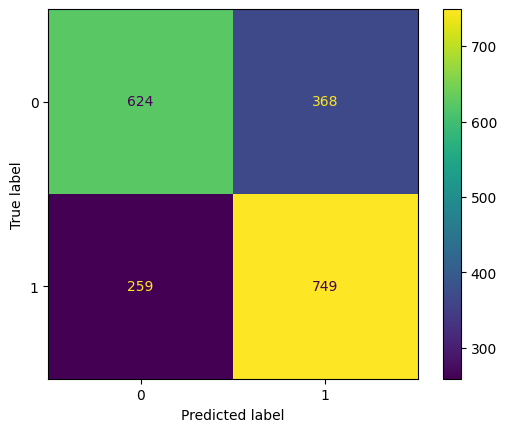

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.71      0.63      0.67       992
           1       0.67      0.74      0.70      1008

    accuracy                           0.69      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.69      0.69      0.69      2000



### Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree classifier
tree = DecisionTreeClassifier(max_depth=5,random_state=42)  # max_depth limits the depth of the tree
tree.fit(X_train, y_train)

# Predict using the trained Decision Tree model
y_pred_tree = tree.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {acc_tree:.4f}")

Decision Tree Accuracy: 0.6610


In [48]:
#Calculating the confusion matrix and the accuracy
cm_DT = confusion_matrix(y_test, y_pred_tree)
print(cm_DT)

[[646 346]
 [332 676]]


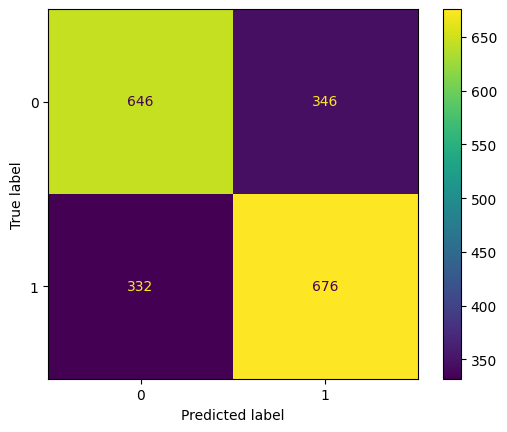

In [49]:
# Display the confusion matrix for the Decision Tree
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_DT, display_labels=tree.classes_)
disp1.plot()
plt.show()

In [50]:
# Print the classification report for the Desicion tree model
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.66      0.65      0.66       992
           1       0.66      0.67      0.67      1008

    accuracy                           0.66      2000
   macro avg       0.66      0.66      0.66      2000
weighted avg       0.66      0.66      0.66      2000



### KNN classifier

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler_knn = StandardScaler()

# Fit the scaler on the training data
X_train_knn = scaler_knn.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_knn = scaler_knn.transform(X_test)

In [52]:
# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=15)  # n_neighbors is the number of neighbors to use for classification

# Τraining the KNN classifier
knn.fit(X_train_knn, y_train)

# Model prediction and accuracy
y_pred_knn = knn.predict(X_test_knn)
acc_knn = accuracy_score(y_test, y_pred_knn)

print(f"KNN Accuracy: {acc_knn:.4f}")

KNN Accuracy: 0.6155


In [53]:
#Calculating the confusion matrix and the accuracy
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[435 557]
 [212 796]]


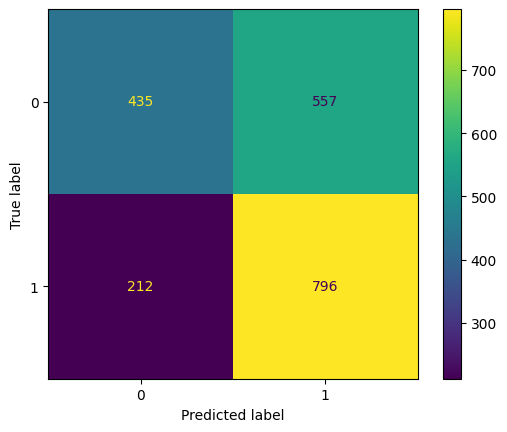

In [54]:
# Display the confusion matrix for the Decision Tree
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp2.plot()
plt.show()

In [55]:
# Print the classification report for the KNN model
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.67      0.44      0.53       992
           1       0.59      0.79      0.67      1008

    accuracy                           0.62      2000
   macro avg       0.63      0.61      0.60      2000
weighted avg       0.63      0.62      0.60      2000



## β) Ann classification
### For All dataset expect the column 0 (column 1 - column 21)

In [56]:
#all rows all columns but expect first (column 1-28)
X = df.iloc[:, 1:]
#all rows, only the first column (column 0 )
y = df.iloc[:, 0]

In [57]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [58]:
# Feature scalling
from sklearn.preprocessing import StandardScaler

scaler_Ann = StandardScaler()

# Fit the scaler on the training data
X_train_Ann = scaler_Ann.fit_transform(X_train)
# Transform the test data using the fitted scaler
X_test_Ann = scaler_Ann.transform(X_test)

In [59]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input

# Building the ANN model
Ann_model = Sequential()
Ann_model.add(Input(shape=(28,)))
Ann_model.add(Dense(32, activation='relu'))
Ann_model.add(Dense(16, activation='relu'))
Ann_model.add(Dense(1, activation='sigmoid'))

# Summary
Ann_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 32)             │           928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,473 (5.75 KB)

 Trainable params: 1,473 (5.75 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# # Training the ANN model
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_Ann = Ann_model.fit(X_train_Ann, y_train, epochs=48, batch_size=16,  validation_data=(X_test_Ann,y_test), callbacks=[early_stop])

Epoch 1/48
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5136 - loss: 0.7278 - val_accuracy: 0.5985 - val_loss: 0.6613
Epoch 2/48
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6254 - loss: 0.6448 - val_accuracy: 0.5970 - val_loss: 0.6549
Epoch 3/48
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6568 - loss: 0.6193 - val_accuracy: 0.6100 - val_loss: 0.6425
Epoch 4/48
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6611 - loss: 0.6064 - val_accuracy: 0.6360 - val_loss: 0.6369
Epoch 5/48
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6726 - loss: 0.5970 - val_accuracy: 0.6400 - val_loss: 0.6352
Epoch 6/48
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6950 - loss: 0.5862 - val_accuracy: 0.6410 - val_loss: 0.6327
Epoch 7/48
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7044 - loss: 0.5697 - val_accuracy: 0.6465 - val_loss: 0.6333
Epoch 8/48
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6984 - loss: 0.5683 - val_accuracy: 0.

In [61]:
# Predicting the test set results
y_pred_Ann = Ann_model.predict(X_test_Ann)
y_pred_Ann = (y_pred_Ann > 0.5)
y_pred_Ann

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [ True],
       [False]])

In [62]:
# Making the Confusion Matrix
cm_Ann = confusion_matrix(y_test, y_pred_Ann)
print(cm_Ann)

[[571 421]
 [297 711]]


In [63]:
# Evaluate the model on test data
loss, accuracy = Ann_model.evaluate(X_test_Ann, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6594 - loss: 0.6134
Test Accuracy: 0.6410


## γ) Calculate and comparing the results from classifier of low and high level quantities

## 1.For low level quantities

In [64]:
y_data = df.iloc[:,0]
X_low = df.iloc[:, 1:22]
X_low.head()

,8.69E-01,-6.35E-01,2.26E-01,3.27E-01,-6.90E-01,7.54E-01,-2.49E-01,-1.09E+00,0.00E+00,1.37E+00,...,9.30E-01,1.11E+00,1.14E+00,-1.58E+00,-1.05E+00,0,6.58E-01,-1.05E-02,-4.58E-02,3.10E+00
0,1.630428,0.404143,0.401026,2.722409,0.355644,1.362199,0.015818,-1.174111,0.000000,1.002695,...,-1.466066,0.000000,0.782744,-0.882768,1.008969,0.000000,1.536386,0.387635,1.596321,1.550981
1,0.326305,-0.797735,0.223471,1.248234,-1.427857,0.923767,-0.278280,-0.470052,0.000000,0.894418,...,-0.809703,0.000000,1.205289,0.352439,0.626202,2.548224,1.626933,-0.426866,1.153501,0.000000
2,1.381170,0.521993,0.574698,0.357347,0.037136,0.413057,-0.607036,-1.308270,0.000000,0.655957,...,-0.454609,2.214872,1.027034,-1.158574,0.533561,0.000000,1.809489,0.567525,-1.475778,0.000000
3,0.304161,-0.736375,0.686225,0.477172,-1.274736,0.907003,0.324770,-0.463954,2.173076,0.468865,...,-0.168871,0.000000,0.618187,2.103758,1.222542,0.000000,1.093142,0.904818,1.165154,0.000000
4,0.661761,0.486930,0.542516,2.630618,1.098063,1.021878,-2.306271,-0.652999,0.000000,1.700830,...,-0.875727,2.214872,1.050918,0.827589,1.201462,0.000000,0.829045,-0.943217,0.566404,3.101961


In [65]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_low_train, X_low_test, y_train, y_test = train_test_split(X_low, y_data, test_size = 0.25, random_state = 42)

## Ann Classifier

In [66]:
# Feture scaling
from sklearn.preprocessing import StandardScaler
scaler_lowAnn = StandardScaler()
Xlow_Ann_train = scaler_lowAnn.fit_transform(X_low_train)
Xlow_Ann_test = scaler_lowAnn.transform(X_low_test)

In [67]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input

# Building the ANN model
Ann_model_low = Sequential()
Ann_model_low.add(Input(shape=(21,)))
Ann_model_low.add(Dense(64, activation='relu'))
Ann_model_low.add(Dense(32, activation='relu'))
Ann_model_low.add(Dense(1, activation='sigmoid'))

# Summary
Ann_model_low.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
# # Training the ANN model
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Ann_model_low.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_low = Ann_model_low.fit(X_low_train, y_train, epochs=48, batch_size=16, validation_split=0.2, callbacks=[early_stop])

Epoch 1/48
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5291 - loss: 0.6961 - val_accuracy: 0.5433 - val_loss: 0.6869
Epoch 2/48
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5672 - loss: 0.6762 - val_accuracy: 0.5517 - val_loss: 0.6851
Epoch 3/48
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6035 - loss: 0.6581 - val_accuracy: 0.5900 - val_loss: 0.6758
Epoch 4/48
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6215 - loss: 0.6494 - val_accuracy: 0.5758 - val_loss: 0.6800
Epoch 5/48
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6315 - loss: 0.6400 - val_accuracy: 0.5617 - val_loss: 0.6861
Epoch 6/48
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6414 - loss: 0.6267 - val_accuracy: 0.5683 - val_loss: 0.6805
Epoch 7/48
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6540 - loss: 0.6206 - val_accuracy: 0.5750 - val_loss: 0.6782
Epoch 8/48
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6711 - loss: 0.6032 - val_accuracy: 0.

In [69]:
# Predicting the test set results
y_pred_lowAnn = Ann_model_low.predict(Xlow_Ann_test)
y_pred_lowAnn = (y_pred_lowAnn > 0.5)
y_pred_lowAnn

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [70]:
# Making the Confusion Matrix
cm_lowAnn = confusion_matrix(y_test, y_pred_lowAnn)
print(cm_lowAnn)

[[391 601]
 [306 702]]


In [71]:
# Evaluate the model on test data
loss, accuracy = Ann_model_low.evaluate(Xlow_Ann_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5610 - loss: 0.6989
Test Accuracy: 0.5465


## Random Forest Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_low = RandomForestClassifier(n_estimators=100,random_state=42) # n_estimators is the number of trees in the forest
rf_low.fit(X_low_train, y_train)
y_pred_rf_low = rf_low.predict(X_low_test)

acc_rf_low = accuracy_score(y_test, y_pred_rf_low)
print(f"Random Forest Accuracy: {acc_rf_low:.4f}")

Random Forest Accuracy: 0.5965


In [73]:
#Calculating the confusion matrix and the accuracy
from sklearn.metrics import confusion_matrix
cm_rf_low = confusion_matrix(y_test, y_pred_rf_low)
print(cm_rf_low)

[[481 511]
 [296 712]]


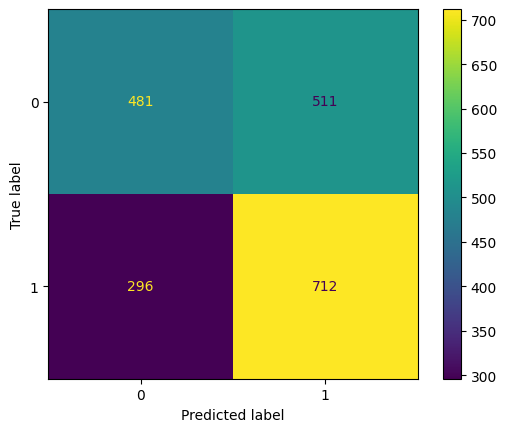

In [74]:
# Build the conffusion matric plot
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
disp_rf_low = ConfusionMatrixDisplay(confusion_matrix=cm_rf_low, display_labels=rf_low.classes_)
disp_rf_low.plot()
plt.show()

In [75]:
# Result table
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf_low))

              precision    recall  f1-score   support

           0       0.62      0.48      0.54       992
           1       0.58      0.71      0.64      1008

    accuracy                           0.60      2000
   macro avg       0.60      0.60      0.59      2000
weighted avg       0.60      0.60      0.59      2000



## Desicion Tree Classifier

In [76]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree classifier
tree_low = DecisionTreeClassifier(max_depth=5,random_state=42)  # max_depth limits the depth of the tree
tree_low.fit(X_low_train, y_train)

# Predict using the trained Decision Tree model
y_pred_tree_low = tree_low.predict(X_low_test)
acc_tree_low = accuracy_score(y_test, y_pred_tree_low)
print(f"Decision Tree Accuracy: {acc_tree_low:.4f}")

Decision Tree Accuracy: 0.5725


In [77]:
#Calculating the confusion matrix and the accuracy
cm_DT_low = confusion_matrix(y_test, y_pred_tree_low)
print(cm_DT_low)

[[518 474]
 [381 627]]


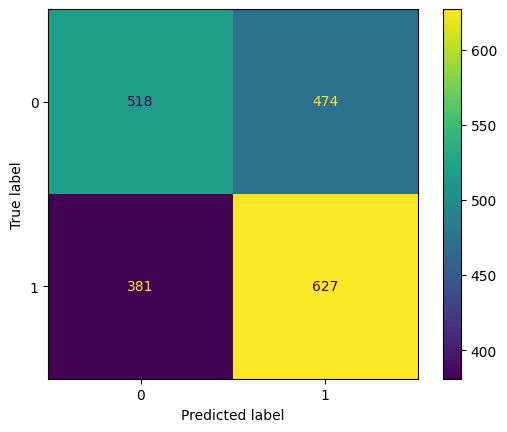

In [78]:
# Display the confusion matrix for the Decision Tree
disp_DT_low = ConfusionMatrixDisplay(confusion_matrix=cm_DT_low, display_labels=tree_low.classes_)
disp_DT_low.plot()
plt.show()

In [79]:
# Print the classification report for the Desicion tree model
print(classification_report(y_test, y_pred_tree_low))

              precision    recall  f1-score   support

           0       0.58      0.52      0.55       992
           1       0.57      0.62      0.59      1008

    accuracy                           0.57      2000
   macro avg       0.57      0.57      0.57      2000
weighted avg       0.57      0.57      0.57      2000



## KNN Classifier

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler_knn_low = StandardScaler()

# Fit the scaler on the training data
X_train_knn_low = scaler_knn_low.fit_transform(X_low_train)

# Transform the test data using the fitted scaler
X_test_knn_low = scaler_knn_low.transform(X_low_test)

In [81]:
# Create and train the KNN classifier
knn_low = KNeighborsClassifier(n_neighbors=15)  # n_neighbors is the number of neighbors to use for classification

# Τraining the KNN classifier
knn_low.fit(X_train_knn_low, y_train)

# Model prediction and accuracy
y_pred_knn_low = knn_low.predict(X_test_knn_low)
acc_knn_low = accuracy_score(y_test, y_pred_knn_low)

print(f"KNN Accuracy: {acc_knn_low:.4f}")

KNN Accuracy: 0.5640


In [82]:
#Calculating the confusion matrix and the accuracy
cm_knn_low = confusion_matrix(y_test, y_pred_knn_low)
print(cm_knn_low)

[[405 587]
 [285 723]]


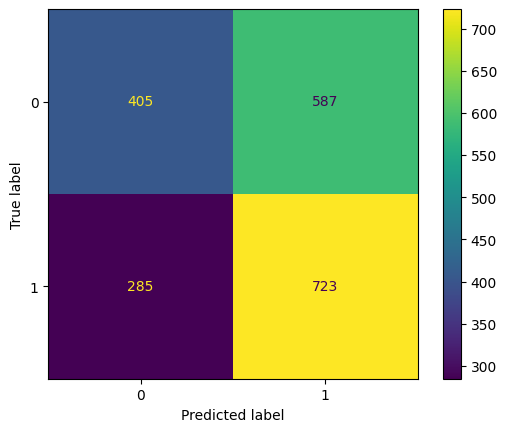

In [83]:
# Display the confusion matrix for the Decision Tree
disp_knn_low = ConfusionMatrixDisplay(confusion_matrix=cm_knn_low, display_labels=knn_low.classes_)
disp_knn_low.plot()
plt.show()

In [84]:
# Print the classification report for the KNN model
print(classification_report(y_test, y_pred_knn_low))

              precision    recall  f1-score   support

           0       0.59      0.41      0.48       992
           1       0.55      0.72      0.62      1008

    accuracy                           0.56      2000
   macro avg       0.57      0.56      0.55      2000
weighted avg       0.57      0.56      0.55      2000



## 2. High Level Quantities

## Ann Classifier

In [85]:
y_data = df.iloc[:,0]
X_high = df.iloc[:, 22:29]
X_high.head()

,1.35E+00,9.80E-01,9.78E-01,9.20E-01,7.22E-01,9.89E-01,8.77E-01
0,0.859235,0.827233,0.995416,0.764766,0.520597,0.850413,0.929865
1,0.887944,0.924601,0.987189,0.854094,0.385013,0.789912,0.724627
2,0.936186,1.107217,0.983808,0.693327,0.562045,0.825387,0.846233
3,1.181790,1.033701,0.993943,0.648399,0.936097,0.732592,0.661779
4,4.883954,2.585889,0.992005,1.935075,1.144530,1.818775,2.094304


In [86]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_high_train, X_high_test, y_train, y_test = train_test_split(X_high, y_data, test_size = 0.25, random_state = 42)

In [87]:
# Feture scaling
from sklearn.preprocessing import StandardScaler
scaler_highAnn = StandardScaler()
Xhigh_Ann_train = scaler_highAnn.fit_transform(X_high_train)
Xhigh_Ann_test = scaler_highAnn.transform(X_high_test)

In [88]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input

# Building the ANN model
Ann_model_high = Sequential()
Ann_model_high.add(Input(shape=(7,)))
Ann_model_high.add(Dense(64, activation='relu'))
Ann_model_high.add(Dense(32, activation='relu'))
Ann_model_high.add(Dense(1, activation='sigmoid'))

# Summary
Ann_model_high.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

In [89]:
# Training the dataset
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Ann_model_high.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_high = Ann_model_high.fit(Xhigh_Ann_train, y_train, epochs=48, batch_size=16, validation_split=0.2, callbacks=[early_stop])

Epoch 1/48
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5835 - loss: 0.6697 - val_accuracy: 0.6467 - val_loss: 0.6285
Epoch 2/48
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6523 - loss: 0.6240 - val_accuracy: 0.6725 - val_loss: 0.6027
Epoch 3/48
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6770 - loss: 0.5989 - val_accuracy: 0.6633 - val_loss: 0.5990
Epoch 4/48
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6755 - loss: 0.5952 - val_accuracy: 0.6917 - val_loss: 0.5841
Epoch 5/48
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6880 - loss: 0.5764 - val_accuracy: 0.6925 - val_loss: 0.5847
Epoch 6/48
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6890 - loss: 0.5818 - val_accuracy: 0.6883 - val_loss: 0.5820
Epoch 7/48
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6822 - loss: 0.5825 - val_accuracy: 0.6867 - val_loss: 0.5851
Epoch 8/48
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6934 - loss: 0.5840 - val_accuracy: 0.

In [90]:
# Predicting the test set results
y_pred_highAnn = Ann_model_high.predict(Xhigh_Ann_test)
y_pred_highAnn = (y_pred_highAnn > 0.5)
y_pred_highAnn

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [91]:
# Making the Confusion Matrix
cm_highAnn = confusion_matrix(y_test, y_pred_highAnn)
print(cm_highAnn)

[[662 330]
 [278 730]]


In [92]:
# Evaluate the model on test data
loss, accuracy = Ann_model_high.evaluate(Xhigh_Ann_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7107 - loss: 0.5564
Test Accuracy: 0.6960


## Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_high = RandomForestClassifier(n_estimators=100,random_state=42) # n_estimators is the number of trees in the forest
rf_high.fit(X_high_train, y_train)
y_pred_rf_high = rf_high.predict(X_high_test)

acc_rf_high = accuracy_score(y_test, y_pred_rf_high)
print(f"Random Forest Accuracy: {acc_rf_high:.4f}")

Random Forest Accuracy: 0.6860


In [94]:
#Calculating the confusion matrix and the accuracy
from sklearn.metrics import confusion_matrix
cm_rf_high = confusion_matrix(y_test, y_pred_rf_high)
print(cm_rf_high)

[[628 364]
 [264 744]]


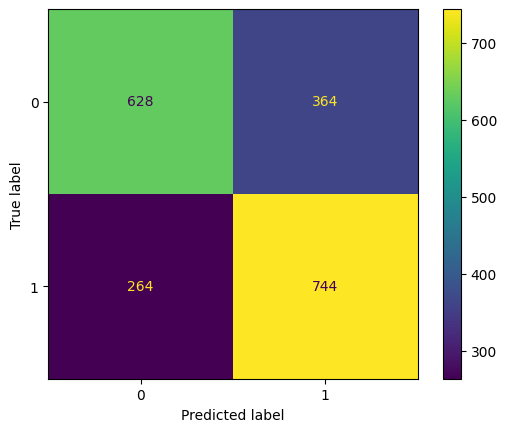

In [95]:
# Build the conffusion matric plot
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
disp_rf_high = ConfusionMatrixDisplay(confusion_matrix=cm_rf_high, display_labels=rf_high.classes_)
disp_rf_high.plot()
plt.show()

In [96]:
# Result table
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf_high))

              precision    recall  f1-score   support

           0       0.70      0.63      0.67       992
           1       0.67      0.74      0.70      1008

    accuracy                           0.69      2000
   macro avg       0.69      0.69      0.68      2000
weighted avg       0.69      0.69      0.69      2000



## Decision Tree Classifier

In [97]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree classifier
tree_high = DecisionTreeClassifier(max_depth=5,random_state=42)  # max_depth limits the depth of the tree
tree_high.fit(X_high_train, y_train)

# Predict using the trained Decision Tree model
y_pred_tree_high = tree_high.predict(X_high_test)
acc_tree_high = accuracy_score(y_test, y_pred_tree_high)
print(f"Decision Tree Accuracy: {acc_tree_high:.4f}")

Decision Tree Accuracy: 0.6590


In [98]:
#Calculating the confusion matrix and the accuracy
cm_DT_high = confusion_matrix(y_test, y_pred_tree_high)
print(cm_DT_high)

[[610 382]
 [300 708]]


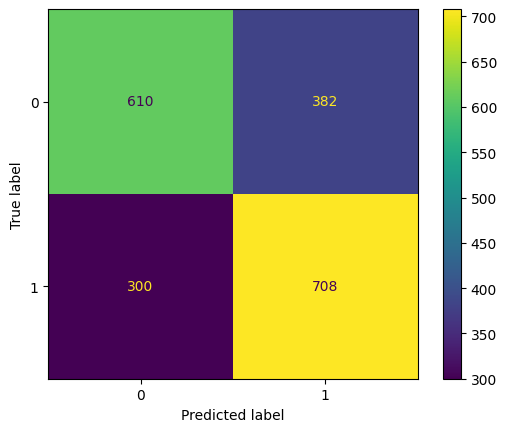

In [99]:
# Display the confusion matrix for the Decision Tree
disp_DT_high = ConfusionMatrixDisplay(confusion_matrix=cm_DT_high, display_labels=tree_high.classes_)
disp_DT_high.plot()
plt.show()

In [100]:
# Print the classification report for the Desicion tree model
print(classification_report(y_test, y_pred_tree_high))

              precision    recall  f1-score   support

           0       0.67      0.61      0.64       992
           1       0.65      0.70      0.67      1008

    accuracy                           0.66      2000
   macro avg       0.66      0.66      0.66      2000
weighted avg       0.66      0.66      0.66      2000



## KNN Classifier

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler_knn_high = StandardScaler()

# Fit the scaler on the training data
X_train_knn_high = scaler_knn_high.fit_transform(X_high_train)

# Transform the test data using the fitted scaler
X_test_knn_high = scaler_knn_high.transform(X_high_test)

In [102]:
# Create and train the KNN classifier
knn_high = KNeighborsClassifier(n_neighbors=15)  # n_neighbors is the number of neighbors to use for classification

# Τraining the KNN classifier
knn_high.fit(X_train_knn_high, y_train)

# Model prediction and accuracy
y_pred_knn_high = knn_high.predict(X_test_knn_high)
acc_knn_high = accuracy_score(y_test, y_pred_knn_high)

print(f"KNN Accuracy: {acc_knn_high:.4f}")

KNN Accuracy: 0.6610


In [103]:
#Calculating the confusion matrix and the accuracy
cm_knn_high = confusion_matrix(y_test, y_pred_knn_high)
print(cm_knn_high)

[[593 399]
 [279 729]]


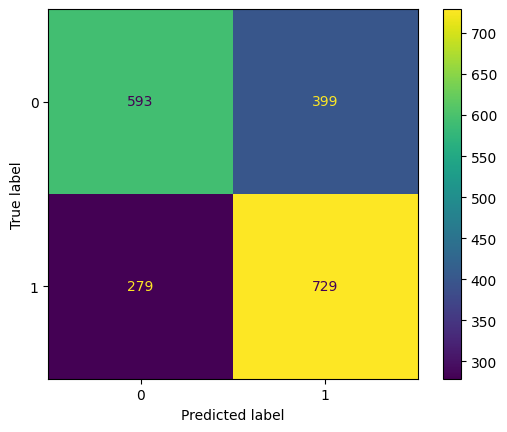

In [104]:
# Display the confusion matrix for the Decision Tree
disp_knn_high = ConfusionMatrixDisplay(confusion_matrix=cm_knn_high, display_labels=knn_high.classes_)
disp_knn_high.plot()
plt.show()

In [105]:
# Print the classification report for the KNN model
print(classification_report(y_test, y_pred_knn_high))

              precision    recall  f1-score   support

           0       0.68      0.60      0.64       992
           1       0.65      0.72      0.68      1008

    accuracy                           0.66      2000
   macro avg       0.66      0.66      0.66      2000
weighted avg       0.66      0.66      0.66      2000

